In [ ]:
#Source of data https://www.kaggle.com/datasets/shashwatwork/injury-prediction-for-competitive-runners/data
#AUTHOR OF THIS MODULE: Alejo Alegre Bustos

In [ ]:
!pip install plotnine

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot



df = pd.read_csv('/content/week_performance.csv')

df


,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.00,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.00,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647


['total kms', 'max km one day', 'max recovery', 'min recovery', 'avg recovery', 'max km Z3-4 one day', 'nr. days with interval session', 'total km Z5-T1-T2', 'total km Z3-4', 'max training success', 'min exertion', 'avg exertion', 'Date', 'max km Z5-T1-T2 one day', 'min training success', 'max exertion', 'avg training success', 'nr. tough sessions (effort in Z5, T1 or T2)', 'total km Z3-Z4-Z5-T1-T2']


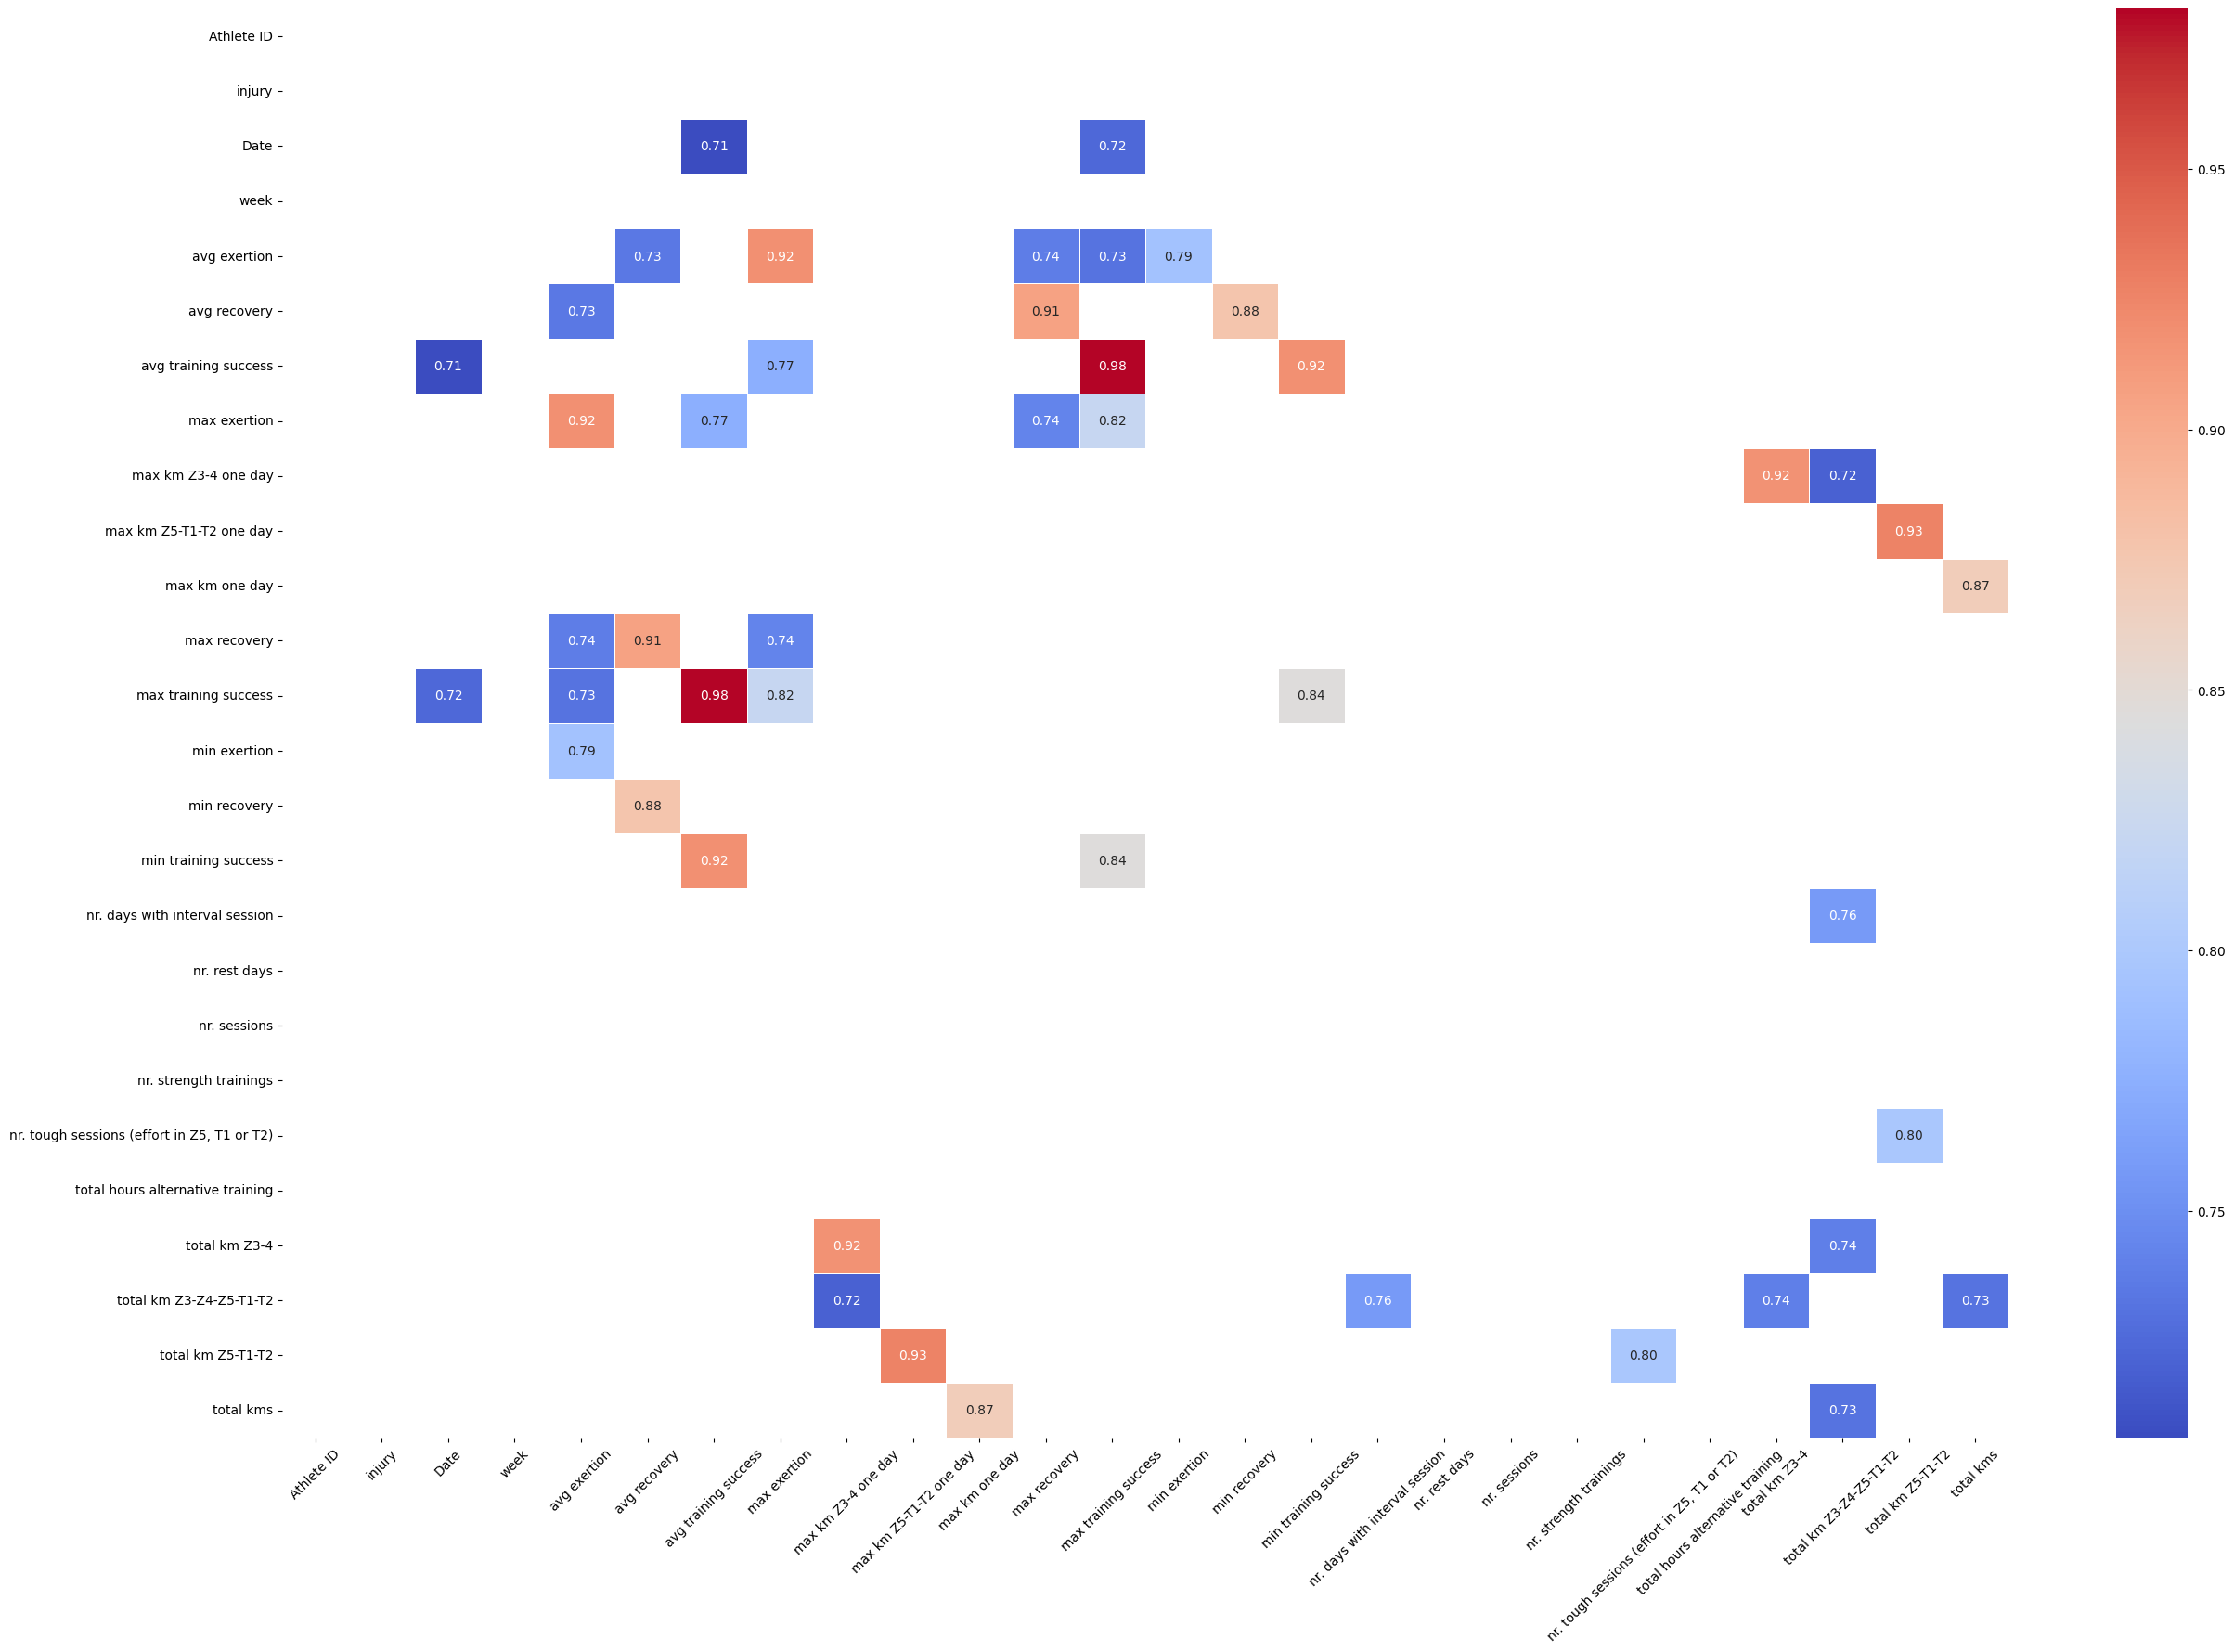

In [ ]:
corrdf = df.corr()


filtered_corr = corrdf.where((corrdf >= 0.7) & (corrdf != 1.0))
correlated_columns = set()


for column in filtered_corr.columns:
    correlated_columns.update(filtered_corr[column].dropna().index)

#list set
correlated_columns = list(correlated_columns)

print(correlated_columns)
filtered_corrdf = corrdf[(corrdf >= 0.7) & (corrdf != 1.0)]
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_corrdf, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.show()


In [ ]:
## ATHLETE 5 SUPERMAN
a5 = df.query('`Athlete ID` == 5')
a5

,Athlete ID,injury,Date,week,avg exertion,avg recovery,avg training success,max exertion,max km Z3-4 one day,max km Z5-T1-T2 one day,...,nr. days with interval session,nr. rest days,nr. sessions,nr. strength trainings,"nr. tough sessions (effort in Z5, T1 or T2)",total hours alternative training,total km Z3-4,total km Z3-Z4-Z5-T1-T2,total km Z5-T1-T2,total kms
9260,5,0,0,0,0.16,0.15,0.0,0.18,0.0,0.0,...,0.0,4.0,3.0,1.0,0.0,0.00,0.0,100.0,0.0,100.0
9261,5,0,0,1,0.14,0.15,0.0,0.16,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.75,0.0,0.0,0.0,60.0
9262,5,0,0,2,0.15,0.14,0.0,0.16,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,1.00,0.0,150.0,0.0,210.0
9263,5,0,4,0,0.17,0.16,0.0,0.18,0.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.00,0.0,19.2,0.0,19.2
9264,5,0,4,1,0.16,0.15,0.0,0.18,0.0,0.0,...,0.0,4.0,3.0,1.0,0.0,0.75,0.0,90.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,5,0,224,1,0.16,0.17,0.0,0.17,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,0.00,0.0,35.3,0.0,35.3
9862,5,0,224,2,0.17,0.18,0.0,0.19,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,0.00,0.0,11.3,0.0,11.3
9863,5,1,246,0,0.16,0.16,0.0,0.18,0.0,0.0,...,0.0,2.0,5.0,0.0,0.0,0.00,0.0,40.7,0.0,40.7
9864,5,1,246,1,0.16,0.17,0.0,0.17,0.0,0.0,...,0.0,2.0,5.0,0.0,0.0,0.00,0.0,54.6,0.0,54.6


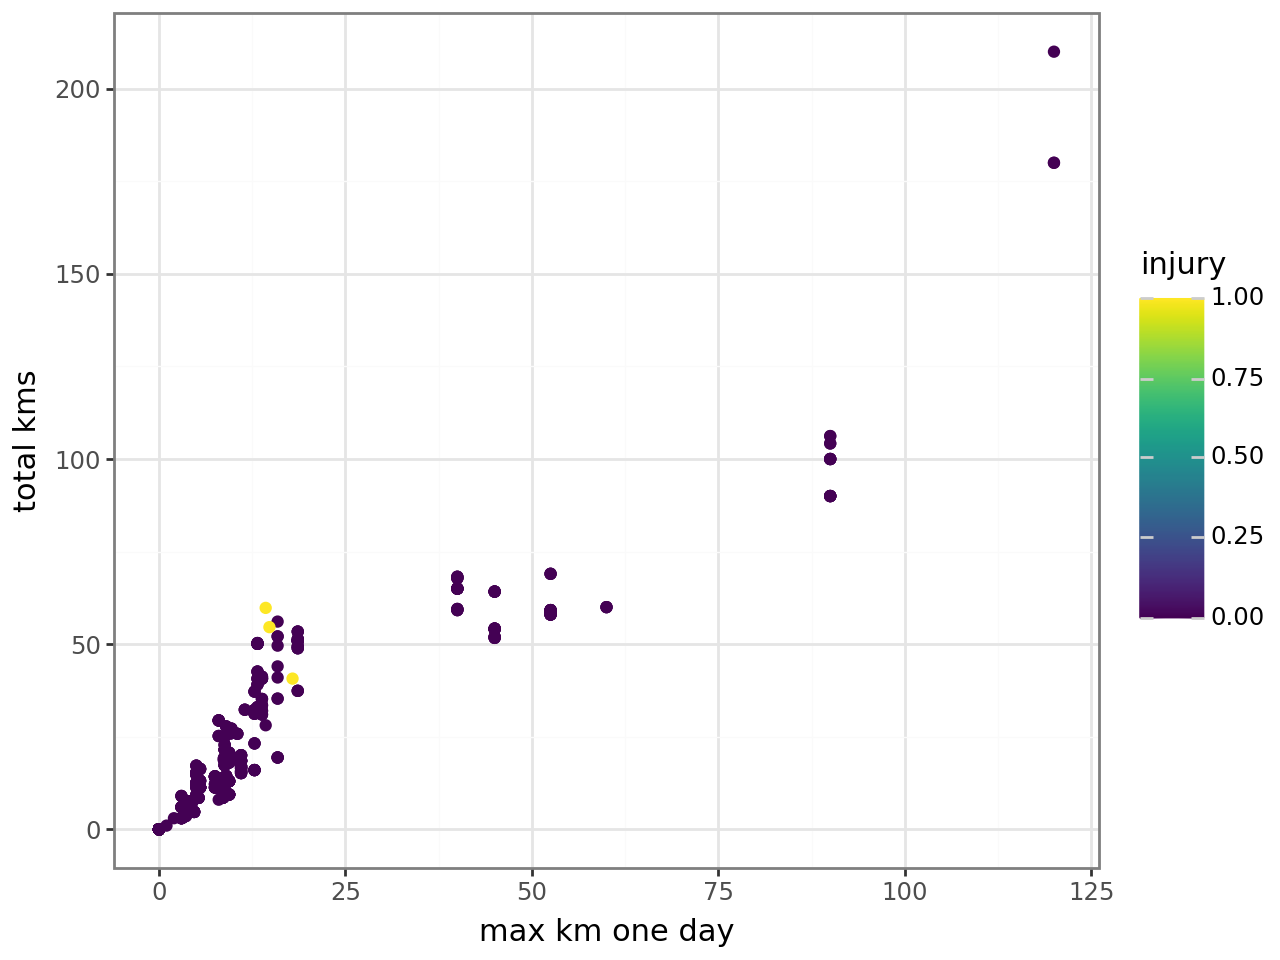

In [ ]:
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_bw
(
    ggplot(data=a5, mapping=aes(x='max km one day', y='total kms',color='injury')) +
    geom_point() +
    theme_bw()
)

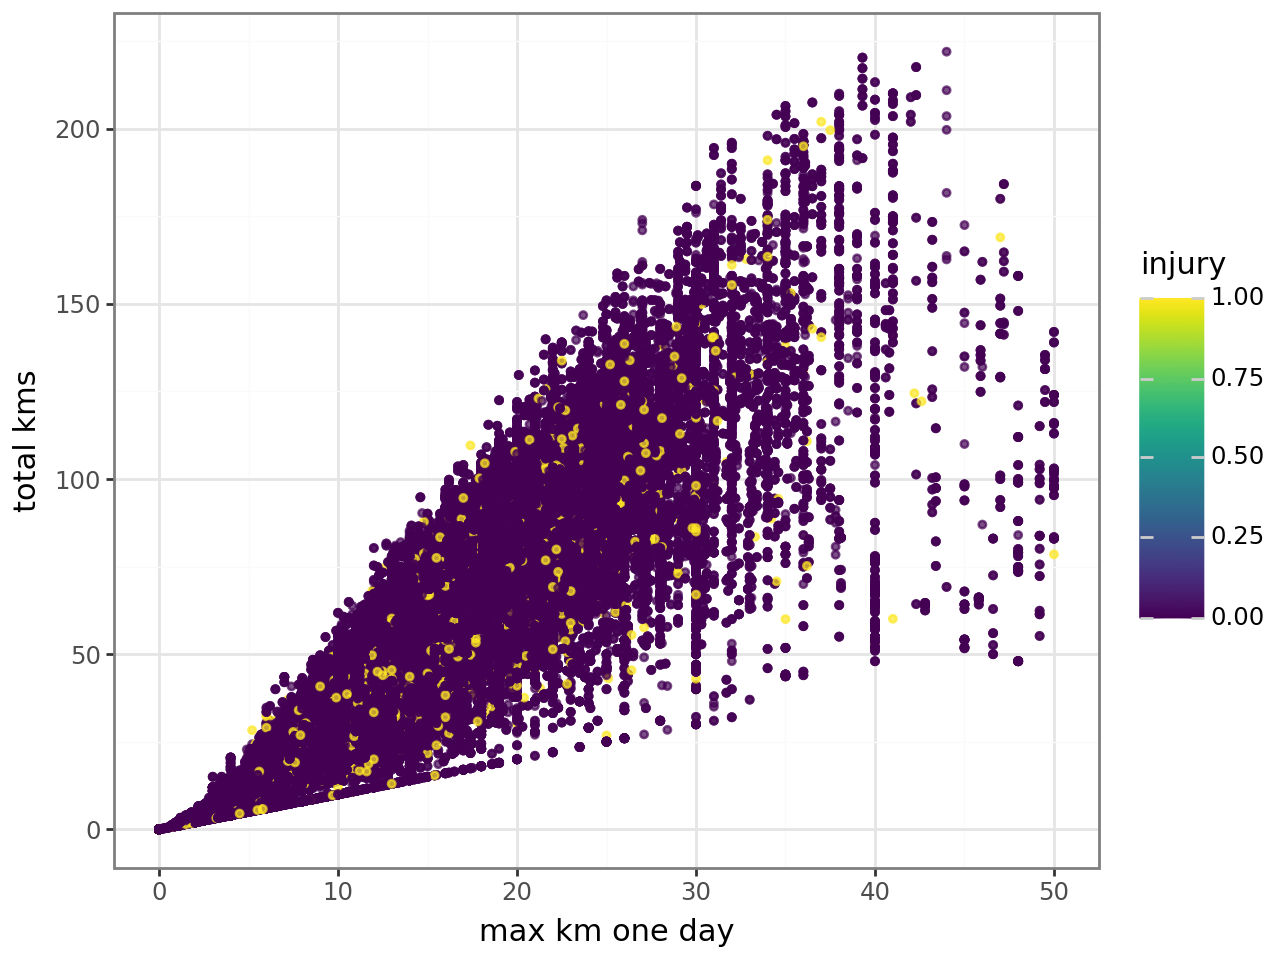

In [ ]:
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_bw

rango1 = df.query('`max km one day` <= 50')


rango2 = df.query('50 < `max km one day` <= 100')


rango3 = df.query('`max km one day` > 100')

(
    ggplot(data=rango1, mapping=aes(x='max km one day', y='total kms', color='injury')) +
    geom_point(alpha=0.7, size=1) +
    theme_bw()
)

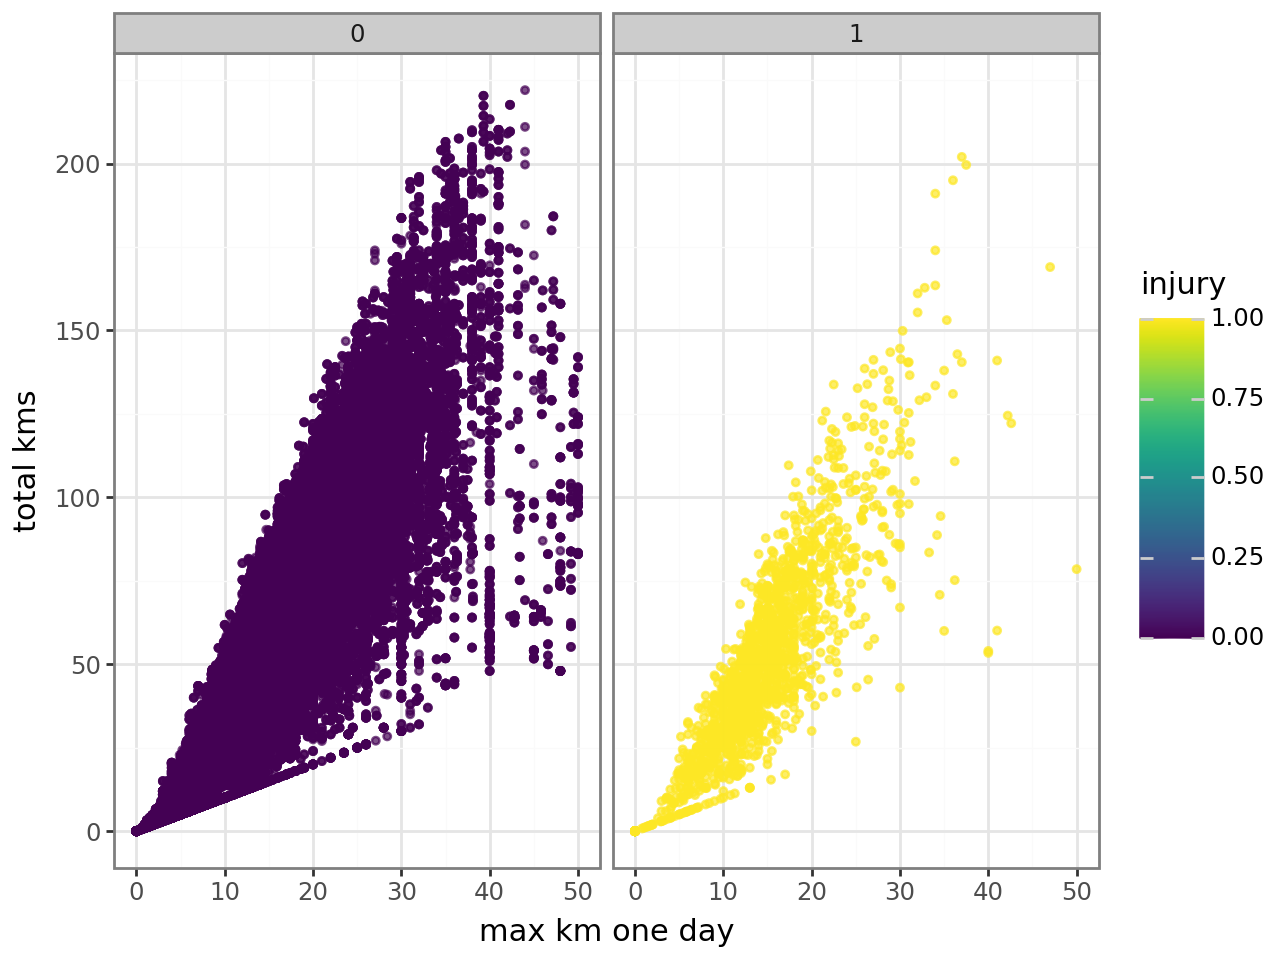

In [ ]:
(
    ggplot(data=rango1, mapping=aes(x='max km one day', y='total kms', color='injury')) +
    geom_point(alpha=0.7, size=1) +
    theme_bw() +
    facet_wrap('injury')
)

<ipython-input-36-c5e1abe99e90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


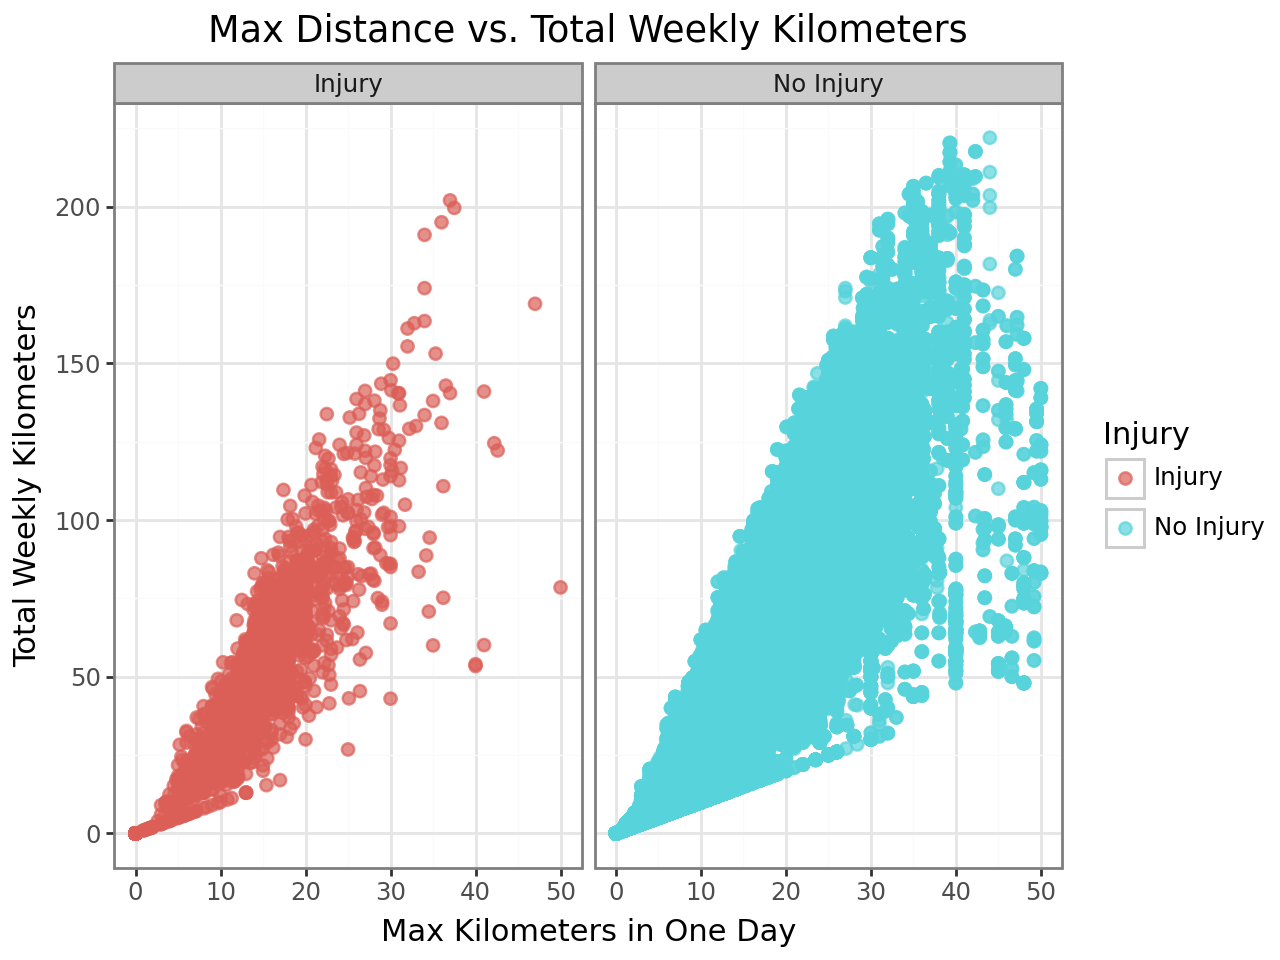

In [ ]:
rango1['injury'] = rango1['injury'].map({0: 'No Injury', 1: 'Injury'})

from plotnine import ggplot, aes, geom_point, theme_bw, facet_wrap, labs

(
    ggplot(data=rango1, mapping=aes(x='max km one day', y='total kms', color='injury')) +
    geom_point(alpha=0.7, size=2) +
    theme_bw() +
    facet_wrap('injury') +
    labs(
        title='Max Distance vs. Total Weekly Kilometers',
        x='Max Kilometers in One Day',
        y='Total Weekly Kilometers',
        color='Injury'
    )
)


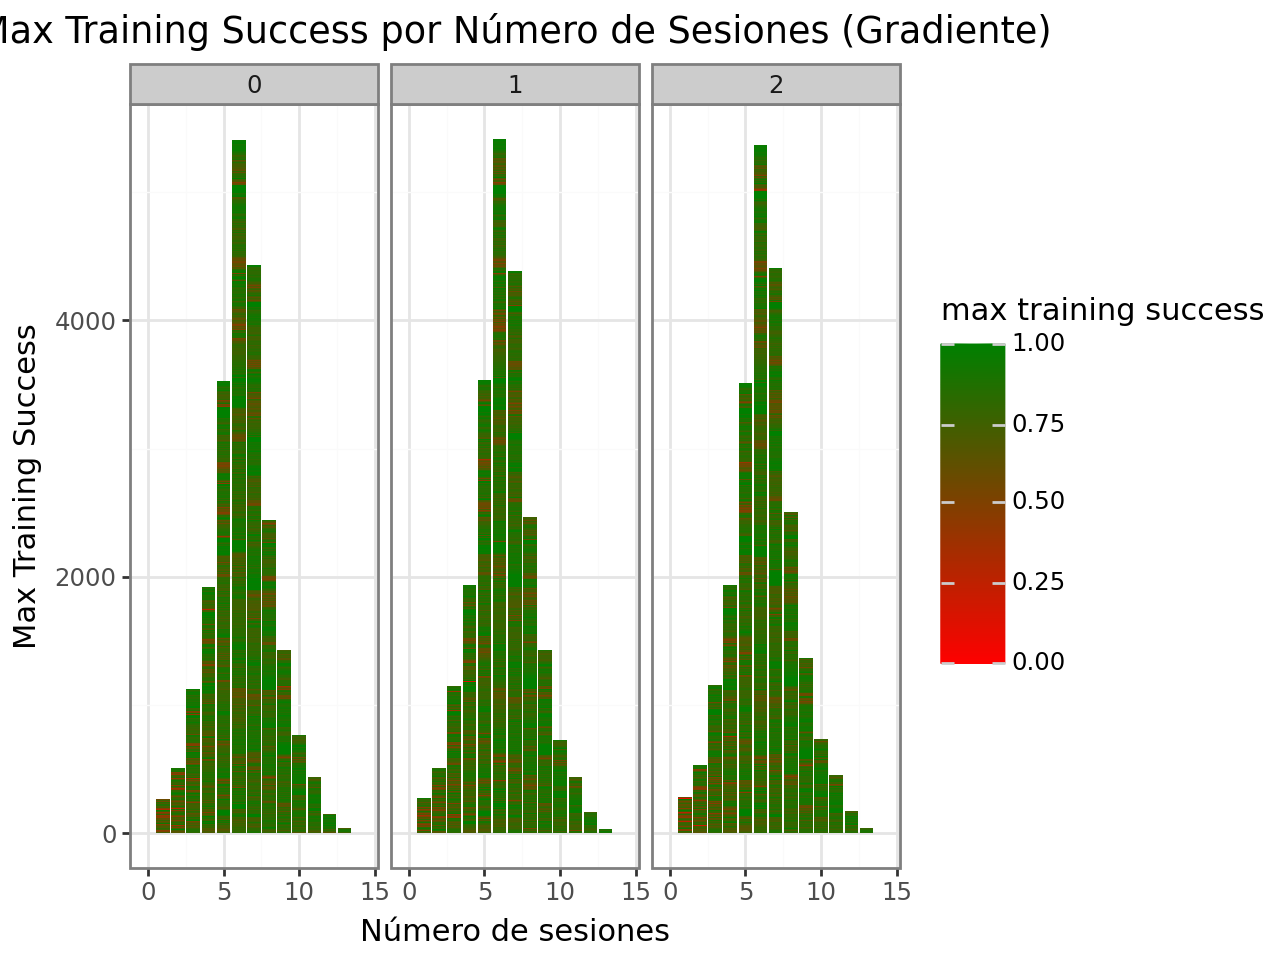

In [ ]:

from plotnine import ggplot, aes, geom_bar, facet_wrap, theme_bw, labs, scale_fill_gradient

# Ahora el gráfico con gradiente de colores
(
    ggplot(df, aes(x='nr. sessions', y='max training success', fill='max training success')) +
    geom_bar(stat='identity') +
    scale_fill_gradient(low='red', high='green') +
    facet_wrap('week') +
    theme_bw() +
    labs(title='Max Training Success por Número de Sesiones (Gradiente)',
         y='Max Training Success',
         x='Número de sesiones')
)


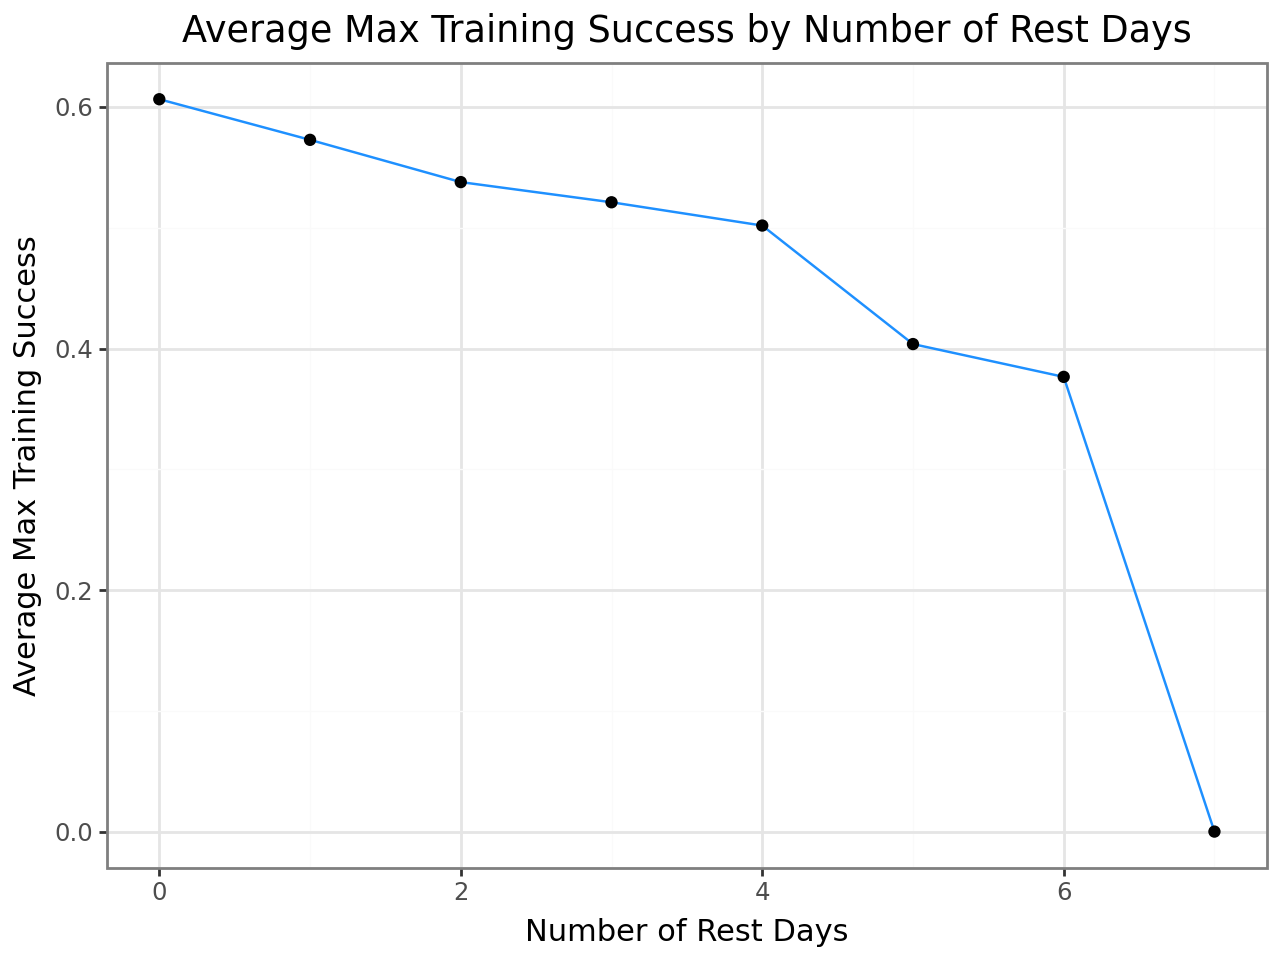

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, theme_bw, labs,facet_wrap
summary_df = df.groupby('nr. rest days', as_index=False)['max training success'].mean()

(
    ggplot(summary_df, aes(x='nr. rest days', y='max training success')) +
    geom_line(group=1, color='dodgerblue') +
    geom_point(color='black') +
    theme_bw() +
    labs(
        title='Average Max Training Success by Number of Rest Days',
        x='Number of Rest Days',
        y='Average Max Training Success'
    )
)


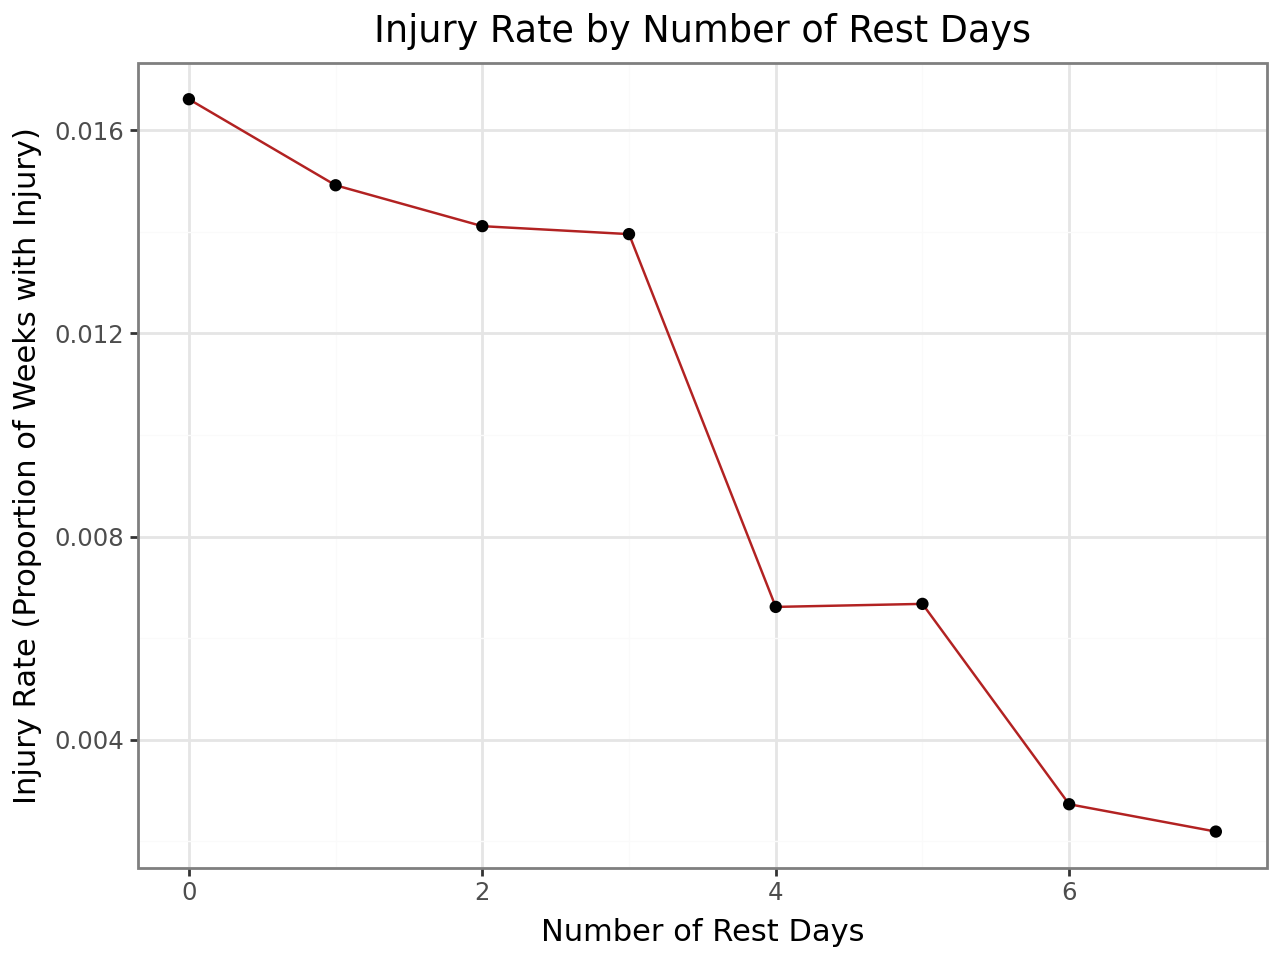

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, theme_bw, labs

# Agrupar por número de días de descanso y calcular el promedio de lesiones
summary_df = df.groupby('nr. rest days', as_index=False)['injury'].mean()

# Crear el gráfico
(
    ggplot(summary_df, aes(x='nr. rest days', y='injury')) +
    geom_line(group=1, color='firebrick') +
    geom_point(color='black') +
    theme_bw() +
    labs(
        title='Injury Rate by Number of Rest Days',
        x='Number of Rest Days',
        y='Injury Rate (Proportion of Weeks with Injury)'
    )
)


In [ ]:
import pandas as pd
import random
import time
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

y = df['injury']  # target
X = df.drop('injury', axis=1)  # features

def test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

results = []

start_total = time.time()  # tiempo inicial total

for i in range(1, 100):
    print(f"Ejecutando iteración {i}/99...")
    start_iter = time.time()  # tiempo inicio de iteración

    e = random.randint(1, 300)
    d = random.randint(1, 300)
    r = random.randint(1, 300)
    k = random.randint(1, 50)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r, stratify=y)
    original_distribution = dict(Counter(y_train))

    # RandomForest
    rf_clf = RandomForestClassifier(max_depth=d, n_estimators=e, random_state=r, class_weight='balanced')
    rf_metrics = test_model(rf_clf, X_train, y_train, X_test, y_test)

    # K-Nearest Neighbors
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_metrics = test_model(knn_clf, X_train, y_train, X_test, y_test)

    results.append({
        'n_estimators': e, 'max_depth': d, 'random_state': r,
        'original_distribution': original_distribution,
        'rf_accuracy': rf_metrics['accuracy'],
        'rf_precision': rf_metrics['precision'],
        'rf_recall': rf_metrics['recall'],
        'rf_f1_score': rf_metrics['f1_score'],
        'knn_n_neighbors': k,
        'knn_accuracy': knn_metrics['accuracy'],
        'knn_precision': knn_metrics['precision'],
        'knn_recall': knn_metrics['recall'],
        'knn_f1_score': knn_metrics['f1_score']
    })

    end_iter = time.time()
    print(f"Iteración {i} completada en {end_iter - start_iter:.2f} segundos.\n")

end_total = time.time()
print(f"Proceso completo en {end_total - start_total:.2f} segundos.")

results_df = pd.DataFrame(results)



Ejecutando iteración 1/99...
Iteración 1 completada en 57.74 segundos.

Ejecutando iteración 2/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 2 completada en 70.78 segundos.

Ejecutando iteración 3/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 3 completada en 38.32 segundos.

Ejecutando iteración 4/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 4 completada en 31.65 segundos.

Ejecutando iteración 5/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 5 completada en 52.15 segundos.

Ejecutando iteración 6/99...
Iteración 6 completada en 34.80 segundos.

Ejecutando iteración 7/99...
Iteración 7 completada en 72.92 segundos.

Ejecutando iteración 8/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 8 completada en 37.28 segundos.

Ejecutando iteración 9/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 9 completada en 41.24 segundos.

Ejecutando iteración 10/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 10 completada en 77.63 segundos.

Ejecutando iteración 11/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 11 completada en 30.82 segundos.

Ejecutando iteración 12/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 12 completada en 73.32 segundos.

Ejecutando iteración 13/99...
Iteración 13 completada en 45.64 segundos.

Ejecutando iteración 14/99...
Iteración 14 completada en 30.50 segundos.

Ejecutando iteración 15/99...
Iteración 15 completada en 38.43 segundos.

Ejecutando iteración 16/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 16 completada en 34.86 segundos.

Ejecutando iteración 17/99...
Iteración 17 completada en 43.33 segundos.

Ejecutando iteración 18/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 18 completada en 56.76 segundos.

Ejecutando iteración 19/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 19 completada en 41.00 segundos.

Ejecutando iteración 20/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 20 completada en 61.85 segundos.

Ejecutando iteración 21/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 21 completada en 66.98 segundos.

Ejecutando iteración 22/99...
Iteración 22 completada en 65.14 segundos.

Ejecutando iteración 23/99...
Iteración 23 completada en 70.44 segundos.

Ejecutando iteración 24/99...
Iteración 24 completada en 64.47 segundos.

Ejecutando iteración 25/99...
Iteración 25 completada en 58.41 segundos.

Ejecutando iteración 26/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 26 completada en 73.28 segundos.

Ejecutando iteración 27/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 27 completada en 41.56 segundos.

Ejecutando iteración 28/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 28 completada en 67.93 segundos.

Ejecutando iteración 29/99...
Iteración 29 completada en 27.46 segundos.

Ejecutando iteración 30/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 30 completada en 70.12 segundos.

Ejecutando iteración 31/99...
Iteración 31 completada en 36.30 segundos.

Ejecutando iteración 32/99...
Iteración 32 completada en 59.90 segundos.

Ejecutando iteración 33/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 33 completada en 54.54 segundos.

Ejecutando iteración 34/99...
Iteración 34 completada en 65.68 segundos.

Ejecutando iteración 35/99...
Iteración 35 completada en 40.14 segundos.

Ejecutando iteración 36/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 36 completada en 67.16 segundos.

Ejecutando iteración 37/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 37 completada en 60.84 segundos.

Ejecutando iteración 38/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 38 completada en 66.40 segundos.

Ejecutando iteración 39/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 39 completada en 59.14 segundos.

Ejecutando iteración 40/99...
Iteración 40 completada en 68.53 segundos.

Ejecutando iteración 41/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 41 completada en 57.98 segundos.

Ejecutando iteración 42/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 42 completada en 35.00 segundos.

Ejecutando iteración 43/99...
Iteración 43 completada en 43.25 segundos.

Ejecutando iteración 44/99...
Iteración 44 completada en 52.16 segundos.

Ejecutando iteración 45/99...
Iteración 45 completada en 59.17 segundos.

Ejecutando iteración 46/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 46 completada en 55.54 segundos.

Ejecutando iteración 47/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 47 completada en 35.08 segundos.

Ejecutando iteración 48/99...
Iteración 48 completada en 71.26 segundos.

Ejecutando iteración 49/99...
Iteración 49 completada en 66.41 segundos.

Ejecutando iteración 50/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 50 completada en 77.43 segundos.

Ejecutando iteración 51/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 51 completada en 46.79 segundos.

Ejecutando iteración 52/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 52 completada en 69.41 segundos.

Ejecutando iteración 53/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 53 completada en 45.19 segundos.

Ejecutando iteración 54/99...
Iteración 54 completada en 52.23 segundos.

Ejecutando iteración 55/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 55 completada en 32.60 segundos.

Ejecutando iteración 56/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 56 completada en 74.12 segundos.

Ejecutando iteración 57/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 57 completada en 56.72 segundos.

Ejecutando iteración 58/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 58 completada en 57.02 segundos.

Ejecutando iteración 59/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 59 completada en 47.47 segundos.

Ejecutando iteración 60/99...
Iteración 60 completada en 68.88 segundos.

Ejecutando iteración 61/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 61 completada en 34.96 segundos.

Ejecutando iteración 62/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 62 completada en 74.43 segundos.

Ejecutando iteración 63/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 63 completada en 68.66 segundos.

Ejecutando iteración 64/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 64 completada en 54.35 segundos.

Ejecutando iteración 65/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 65 completada en 34.08 segundos.

Ejecutando iteración 66/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 66 completada en 67.54 segundos.

Ejecutando iteración 67/99...
Iteración 67 completada en 36.29 segundos.

Ejecutando iteración 68/99...
Iteración 68 completada en 31.31 segundos.

Ejecutando iteración 69/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 69 completada en 45.21 segundos.

Ejecutando iteración 70/99...
Iteración 70 completada en 36.93 segundos.

Ejecutando iteración 71/99...
Iteración 71 completada en 76.04 segundos.

Ejecutando iteración 72/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 72 completada en 79.40 segundos.

Ejecutando iteración 73/99...
Iteración 73 completada en 52.61 segundos.

Ejecutando iteración 74/99...
Iteración 74 completada en 76.21 segundos.

Ejecutando iteración 75/99...
Iteración 75 completada en 70.84 segundos.

Ejecutando iteración 76/99...
Iteración 76 completada en 70.77 segundos.

Ejecutando iteración 77/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 77 completada en 35.73 segundos.

Ejecutando iteración 78/99...
Iteración 78 completada en 68.45 segundos.

Ejecutando iteración 79/99...
Iteración 79 completada en 76.83 segundos.

Ejecutando iteración 80/99...
Iteración 80 completada en 79.38 segundos.

Ejecutando iteración 81/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 81 completada en 53.95 segundos.

Ejecutando iteración 82/99...
Iteración 82 completada en 45.46 segundos.

Ejecutando iteración 83/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 83 completada en 67.37 segundos.

Ejecutando iteración 84/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 84 completada en 38.80 segundos.

Ejecutando iteración 85/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 85 completada en 80.44 segundos.

Ejecutando iteración 86/99...
Iteración 86 completada en 33.01 segundos.

Ejecutando iteración 87/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 87 completada en 50.85 segundos.

Ejecutando iteración 88/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 88 completada en 62.39 segundos.

Ejecutando iteración 89/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 89 completada en 78.41 segundos.

Ejecutando iteración 90/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 90 completada en 49.35 segundos.

Ejecutando iteración 91/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 91 completada en 46.60 segundos.

Ejecutando iteración 92/99...
Iteración 92 completada en 36.96 segundos.

Ejecutando iteración 93/99...
Iteración 93 completada en 43.50 segundos.

Ejecutando iteración 94/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 94 completada en 69.73 segundos.

Ejecutando iteración 95/99...
Iteración 95 completada en 56.84 segundos.

Ejecutando iteración 96/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 96 completada en 63.04 segundos.

Ejecutando iteración 97/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 97 completada en 35.96 segundos.

Ejecutando iteración 98/99...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Iteración 98 completada en 76.89 segundos.

Ejecutando iteración 99/99...
Iteración 99 completada en 61.98 segundos.

Proceso completo en 5480.68 segundos.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
results_df

,n_estimators,max_depth,random_state,original_distribution,rf_accuracy,rf_precision,rf_recall,rf_f1_score,knn_n_neighbors,knn_accuracy,knn_precision,knn_recall,knn_f1_score
0,139,287,237,"{0: 88654, 1: 1207}",0.986550,0.980031,0.986550,0.979922,25,0.986576,0.986756,0.986576,0.979935
1,222,149,14,"{0: 88654, 1: 1207}",0.986602,0.986781,0.986602,0.980000,20,0.986550,0.973281,0.986550,0.979871
2,52,258,237,"{0: 88654, 1: 1207}",0.986550,0.980031,0.986550,0.979922,48,0.986550,0.973281,0.986550,0.979871
3,108,2,212,"{0: 88654, 1: 1207}",0.475761,0.978890,0.475761,0.631913,29,0.986550,0.973281,0.986550,0.979871
4,129,239,166,"{0: 88654, 1: 1207}",0.986576,0.986756,0.986576,0.979935,26,0.986550,0.973281,0.986550,0.979871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,157,47,125,"{0: 88654, 1: 1207}",0.986628,0.986807,0.986628,0.980064,4,0.986810,0.984095,0.986810,0.980701
95,181,221,159,"{0: 88654, 1: 1207}",0.986628,0.986807,0.986628,0.980064,43,0.986550,0.973281,0.986550,0.979871
96,42,76,159,"{0: 88654, 1: 1207}",0.986628,0.986807,0.986628,0.980064,41,0.986550,0.973281,0.986550,0.979871
97,268,24,263,"{0: 88654, 1: 1207}",0.986628,0.986807,0.986628,0.980064,44,0.986550,0.973281,0.986550,0.979871


In [ ]:
df_pre=pd.read_csv('/content/week_hold_out.csv')
df_pre.head(5)

,Athlete ID,Date,week,avg exertion,avg recovery,avg training success,max exertion,max km Z3-4 one day,max km Z5-T1-T2 one day,max km one day,...,nr. days with interval session,nr. rest days,nr. sessions,nr. strength trainings,"nr. tough sessions (effort in Z5, T1 or T2)",total hours alternative training,total km Z3-4,total km Z3-Z4-Z5-T1-T2,total km Z5-T1-T2,total kms
0,52,1478,2,0.26,0.23,0.81,0.30,0.0,0.0,0.0,...,0,1,6,2,0,4.17,0.0,0.0,0.0,0.0
1,41,2255,1,0.16,0.13,0.90,0.19,10.0,9.3,16.3,...,2,0,8,1,1,0.00,10.0,21.7,9.3,68.1
2,29,922,1,0.14,0.11,0.91,0.37,0.0,0.0,8.7,...,0,1,6,1,0,0.00,0.0,1.5,0.0,33.2
3,50,2080,0,0.20,0.19,0.86,0.33,0.0,0.0,13.5,...,0,3,4,0,0,0.00,0.0,0.0,0.0,46.7
4,32,1544,0,0.31,0.32,0.77,0.43,6.5,6.5,19.5,...,2,0,8,0,1,0.00,6.5,13.0,6.5,96.2


In [ ]:
y = df['injury']  # target
X = df.drop('injury', axis=1)  # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=237, stratify=y)

clf = RandomForestClassifier(warm_start=False, n_estimators=139, random_state=237, max_depth=287)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Cambiar a average='weighted' para tener en cuenta la frecuencia de cada clase
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión para multiclase
print("Confusion Matrix:\n", cm)

# Si deseas obtener información detallada sobre cada clase, puedes iterar sobre la matriz:
for i in range(len(cm)):
    print(f"Class {i} - TP: {cm[i, i]}, FP: {cm[i, :].sum() - cm[i, i]}, FN: {cm[:, i].sum() - cm[i, i]}, TN: {cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])}")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

new_pred = clf.predict(df_pre)

predictions = pd.DataFrame(new_pred, columns=['injury'])

predictions.to_csv("injury-predictions.csv", index=False)


Confusion Matrix:
 [[37994     1]
 [  505    13]]
Class 0 - TP: 37994, FP: 1, FN: 505, TN: 13
Class 1 - TP: 13, FP: 505, FN: 1, TN: 37994
Accuracy: 0.986861579207021
Precision: 0.9860984883236128
Recall: 0.986861579207021
F1 Score: 0.9806813996246619
